**Convolutional Neural Network (CNN)**

What CNN’s can do?

1. cancer detection
2. Biometric authendication
3. Self-driving car / autonomous car to detect obstacles
4. Image captioning
5. Handwriting letter recognition

Why CNN?
1.  Automatic Feature Extraction
2. It is not fully connection - reduce the compution
3. invariant to the location of the object in the images

CNN:
1. Input Layer
2. Convolution Layer
3. Pooling Layer
4. Flatten Layer
5. Fully Connected Layer
6. Ouput Layer

How it works:

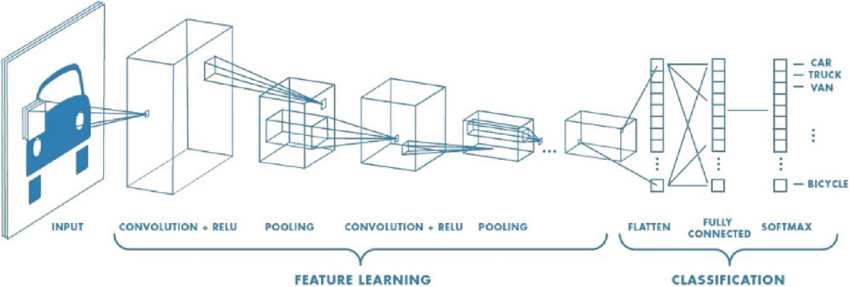

Data - Airplane, Automobile, Bird, Cat, Dog, Frog, Horse, Ship, Truck => 60,000

32 x 32--> 50000 train 10000 test



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

cifar10 = tf.keras.datasets.cifar10

In [3]:
# split the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


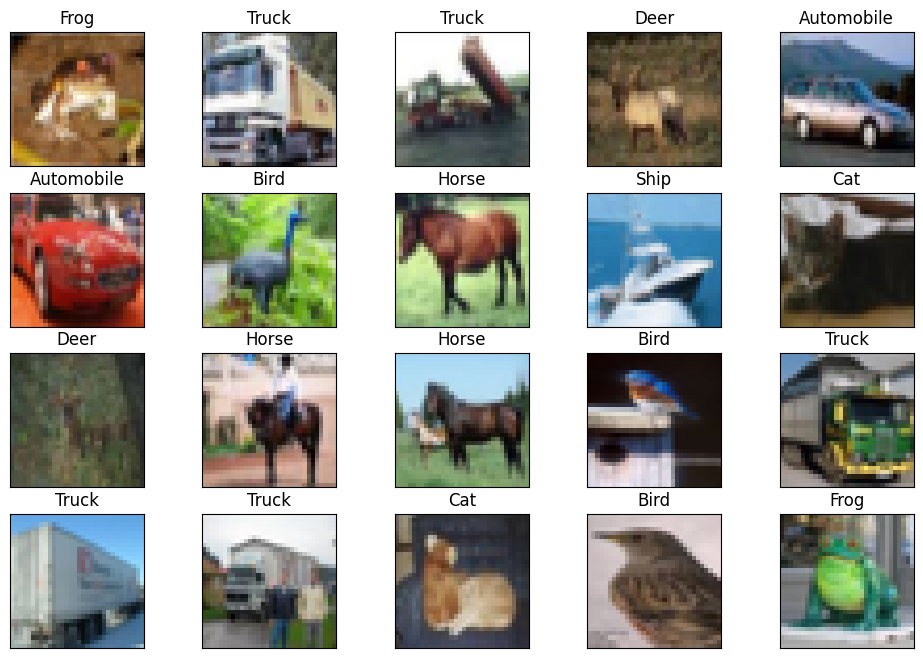

In [7]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

fig, axes = plt.subplots(ncols = 5, nrows = 4, figsize=(12, 8))

index =0
for i in range(4):
  for j in range(5):
    axes[i,j].set_title(labels[y_train[index][0]])
    axes[i,j].imshow(X_train[index])
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)

    index += 1

In [8]:
# normalization

X_train = X_train / 255.0
X_test = X_test / 255.0



In [10]:
from tensorflow.keras.utils import to_categorical

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

CNN:

1. Input Layer
2. Convolution Layer
3. Pooling Layer
4. Flatten Layer
5. Fully Connected Layer
6. Ouput Layer

In [11]:
# CNN Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization


In [12]:
# Model create

cnn_model = Sequential()

In [15]:
#Input Convolutional Layer

cnn_model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 input_shape = (32, 32, 3 ),
                 activation = 'relu',
                 padding='same'))

#Batch Normalization
cnn_model.add(BatchNormalization())

# Convolutional Layer
cnn_model.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 input_shape = (32, 32, 3 ),
                 activation = 'relu',
                 padding='same'))
#Batch Normalization
cnn_model.add(BatchNormalization())


In [17]:
#Pooling
cnn_model.add(MaxPool2D(pool_size = (2,2)))


In [18]:
# Dropout Layer
cnn_model.add(Dropout(0.25))

In [19]:
cnn_model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 input_shape = (32, 32, 3 ),
                 activation = 'relu',
                 padding='same'))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 input_shape = (32, 32, 3 ),
                 activation = 'relu',
                 padding='same'))
cnn_model.add(BatchNormalization())

In [20]:
#pooling layer & dropout layer
cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.25))

In [21]:
# Flattening Layer
cnn_model.add(Flatten())

In [25]:
# Fully connected layer

cnn_model.add(Dense(128,activation = 'relu'))
cnn_model.add(Dropout(0.25))

#output layer
cnn_model.add(Dense(10, activation = 'softmax'))

In [ ]:
# Compile & train the model

cnn_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

cnn_model.fit(X_train, y_train, epochs = 12)

Epoch 1/12
1251/1563 [=======================>......] - ETA: 1:49 - loss: 1.6433 - accuracy: 0.4088

In [ ]:
# Model Evaluation
prediction = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {prediction[1] * 100:.2f}%')')